In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission_data = pd.read_csv("sample_submission.csv")

print("train_data : ", train_data.shape)
print("test_data : ", test_data.shape)
print("sample_submission_data : ", sample_submission_data.shape)

train_data :  (3116945, 22)
test_data :  (2077964, 21)
sample_submission_data :  (2077964, 2)


In [4]:
train_data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [6]:
train_data = train_data.drop_duplicates()
train_data.shape

(3116945, 22)

In [7]:
# % missing values
def null_percent(df):
    null_count = df.isnull().sum()
    total_rows = len(df)
    percent_missing = (null_count/total_rows) * 100
    rounded_percent = percent_missing.round(2)
    return rounded_percent

print("Train Data NaN Values")
print(null_percent(train_data))
print("Test Data NaN Values")
print(null_percent(test_data))

Train Data NaN Values
id                       0.00
class                    0.00
cap-diameter             0.00
cap-shape                0.00
cap-surface             21.53
cap-color                0.00
does-bruise-or-bleed     0.00
gill-attachment         16.81
gill-spacing            40.37
gill-color               0.00
stem-height              0.00
stem-width               0.00
stem-root               88.45
stem-surface            63.55
stem-color               0.00
veil-type               94.88
veil-color              87.94
has-ring                 0.00
ring-type                4.13
spore-print-color       91.43
habitat                  0.00
season                   0.00
dtype: float64
Test Data NaN Values
id                       0.00
cap-diameter             0.00
cap-shape                0.00
cap-surface             21.51
cap-color                0.00
does-bruise-or-bleed     0.00
gill-attachment         16.83
gill-spacing            40.40
gill-color               0.00
stem-height 

In [8]:
def fill_na_with_median(df):
    num_cols = df.select_dtypes(include=['float64']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

fill_na_with_median(train_data)
fill_na_with_median(test_data)

Distribution of 'class':
class
p    1705396
e    1411549
Name: count, dtype: int64


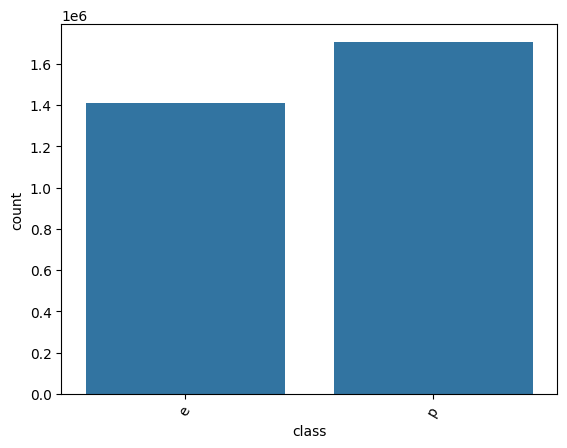

In [9]:
def plot_class_distribution(df, column_name):
    # the number of appearances for each class
    class_counts = df[column_name].value_counts()
    print(f"Distribution of '{column_name}':\n{class_counts}\n")

    # graph
    sns.countplot(x=column_name,data=df)
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_data,'class')

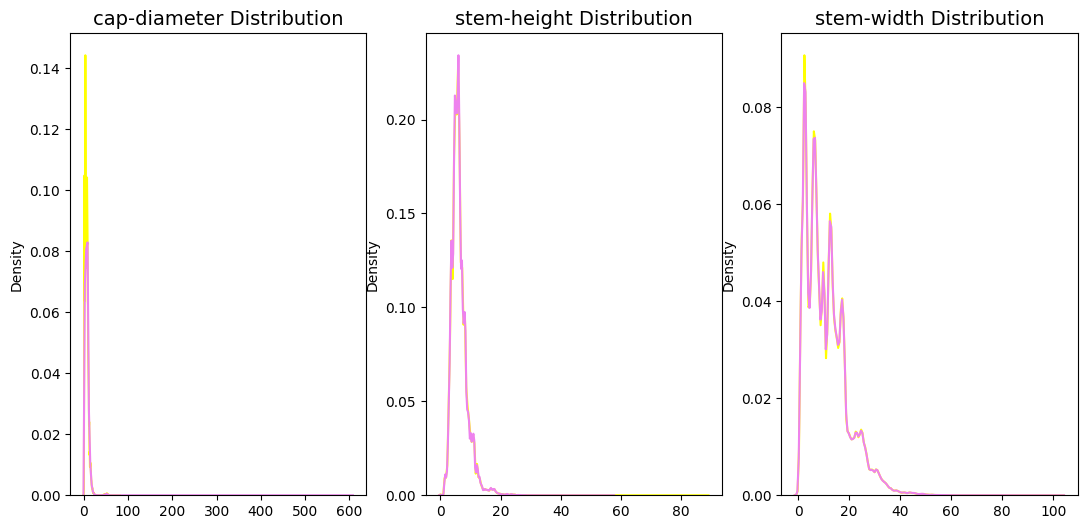

In [10]:
num_features = train_data._get_numeric_data().columns.difference(['id']) # does not include id 

fig, axes = plt.subplots(1,3, figsize=(13,6))

for index, column in enumerate(num_features):
    if column in train_data.columns:
        sns.kdeplot(data=train_data, x=column, ax=axes[index], label='Train',color='yellow')
    if column in test_data.columns:
        sns.kdeplot(data=test_data,x=column, ax=axes[index], label='Test',color='violet')

    axes[index].set_title(f'{column} Distribution', fontsize = 14)
    axes[index].set_xlabel(None)